In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hostnames = []
dataset = []
df = None



In [3]:
def set_hostnames(number_of_hosts : int) -> None:
    SO_prefix = ["L"]*40 + ["S"]*30 + ["A"]*20 + ["H"]*10 # Linux: 40% Solaris: 30% AIX: 20% HP-UX: 10%
    entorno = ["D"]*10 + ["I"]*10 + ["T"]*25 + ["S"]*25 + ["P"]*30 # Development: 10% Integration: 10% Testing: 25% Staging: 25% Production: 30%
    pais = ["NOR"]*6 + ["FRA"]*9 + ["ITA"]*16 + ["ESP"]*16 + ["DEU"]*23 + ["IRL"]*30 #Norway: 6% France: 9% Italy: 16% Spain: 16% Germany: 23% Ireland: 30%
    grupo_alpha = []
    
    for i in range(number_of_hosts):
        paises = random.choice(pais)
        hostname = random.choice(SO_prefix) + random.choice(entorno)
        hostname += paises
        grupo_alpha.append(hostname)
        hostname +=str(grupo_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)
        

In [4]:
def get_os(codigo_SO:str) -> str:
    if codigo_SO.startswith("L"):
        return "Linux"
    elif codigo_SO.startswith("S"):
        return "Solaris"
    elif codigo_SO.startswith("A"):
        return "AIX"
    elif codigo_SO.startswith("H"):
        return "HP-UX"
    else:
        return "Unknown"
    

In [5]:
def get_enviroment(codigo_SO: str) -> str:
    if codigo_SO[1] == "D":
        return "Development"
    elif codigo_SO[1] == "I":
        return "Integration"
    elif codigo_SO[1] == "T":
        return "Testing"
    elif codigo_SO[1] == "S":
        return "Staging"
    elif codigo_SO[1] == "P":
        return "Production"
    else:
        return "Unknown"
    

In [6]:
def get_country(codigo_SO: str) -> str:
    if codigo_SO[2:5] == "NOR":
        return "Norway"
    if codigo_SO[2:5] == "FRA":
        return "France"
    if codigo_SO[2:5] == "ITA":
        return "Italy"
    if codigo_SO[2:5] == "ESP":
        return "Spain"
    if codigo_SO[2:5] == "DEU":
        return "Germany"
    if codigo_SO[2:5] == "IRL":
        return "Ireland"
    else:
        return "Unknown"
    
    

In [7]:
def set_dataframe(numero: int) -> None:
    global df
    
    set_hostnames(numero)
    
    for codigo_SO in hostnames:
        dataset.append({
            "codigo_SO": codigo_SO,
            "SO_prefix": get_os(codigo_SO),
            "entorno": get_enviroment(codigo_SO),
            "pais": get_country(codigo_SO),
            "numero": int(codigo_SO[-2:])
        })
    df = pd.DataFrame(dataset)

In [8]:
set_dataframe(1500)
df

,codigo_SO,SO_prefix,entorno,pais,numero
0,LSESP001,Linux,Staging,Spain,1
1,ATITA001,AIX,Testing,Italy,1
2,LSFRA001,Linux,Staging,France,1
3,LDESP001,Linux,Development,Spain,1
4,SDESP001,Solaris,Development,Spain,1
...,...,...,...,...,...
1495,ATIRL024,AIX,Testing,Ireland,24
1496,ATESP012,AIX,Testing,Spain,12
1497,SPNOR011,Solaris,Production,Norway,11
1498,LSITA022,Linux,Staging,Italy,22


In [9]:
df.to_csv('hosts.csv', header=True, index=False)
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,codigo_SO,SO_prefix,entorno,pais,numero
0,LSESP001,Linux,Staging,Spain,1
1,ATITA001,AIX,Testing,Italy,1
2,LSFRA001,Linux,Staging,France,1
3,LDESP001,Linux,Development,Spain,1
4,SDESP001,Solaris,Development,Spain,1
...,...,...,...,...,...
1495,ATIRL024,AIX,Testing,Ireland,24
1496,ATESP012,AIX,Testing,Spain,12
1497,SPNOR011,Solaris,Production,Norway,11
1498,LSITA022,Linux,Staging,Italy,22


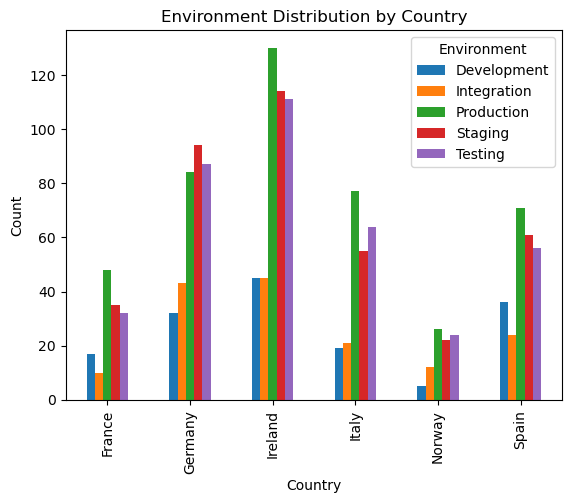

In [10]:
grouped_data = hosts_df.groupby(['pais', 'entorno']).size().unstack()


ax = grouped_data.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Environment Distribution by Country')
plt.legend(title='Environment')


plt.show()


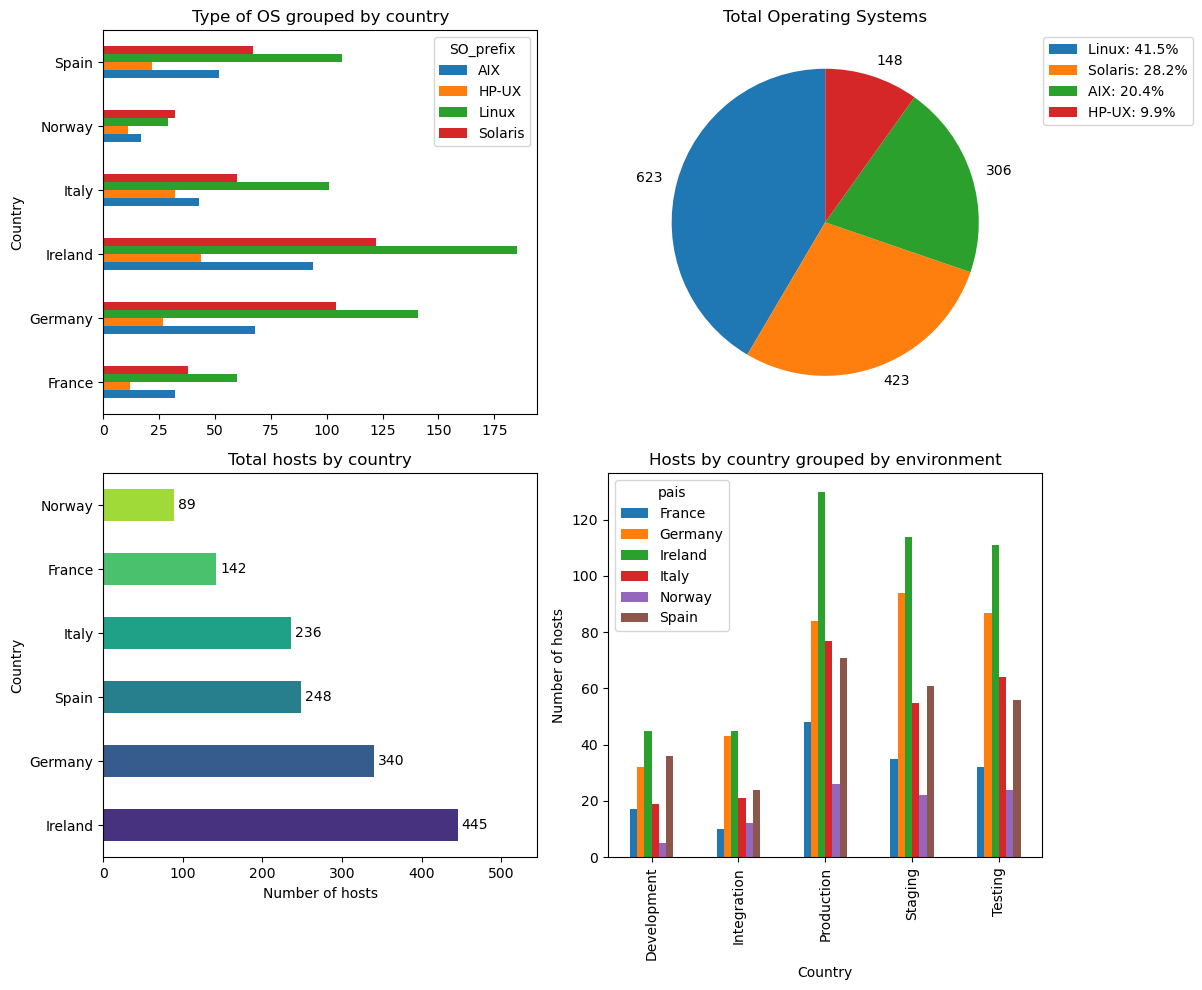

In [11]:

fig, ax1 = plt.subplots(2, 2, figsize=(12, 10))


grouped_os = hosts_df.groupby(['pais', 'SO_prefix']).size().unstack()
grouped_os.plot(kind='barh', ax=ax1[0, 0])
ax1[0, 0].set_title('Type of OS grouped by country')
ax1[0, 0].set_ylabel('Country')


total_os = hosts_df['SO_prefix'].value_counts()
ax1[0, 1].pie(total_os, labels=total_os, pctdistance=0.85, startangle=90)
ax1[0, 1].set_title('Total Operating Systems')
legend_labels = [f'{os}: {percentage:.1f}%' 
                 for os, percentage in zip(total_os.index, total_os / len(hosts_df) * 100)]
ax1[0, 1].legend(labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
total_percentage = len(hosts_df) / len(total_os) * 100


total_hosts_by_country = hosts_df['pais'].value_counts()
total_hosts_by_country.plot(kind='barh', color=sns.color_palette("viridis"), ax=ax1[1, 0])
ax1[1, 0].set_title('Total hosts by country')
ax1[1, 0].set_xlabel('Number of hosts')
ax1[1, 0].set_ylabel('Country')
ax1[1, 0].set_xlim(0, max(total_hosts_by_country) + 100)

for i, v in enumerate(total_hosts_by_country):
    ax1[1, 0].text(v + 5, i, str(v), va='center')


grouped_hosts_by_environment = hosts_df.groupby(['entorno', 'pais']).size().unstack()
grouped_hosts_by_environment.plot(kind='bar', ax=ax1[1, 1])
ax1[1, 1].set_title('Hosts by country grouped by environment')
ax1[1, 1].set_xlabel('Country')
ax1[1, 1].set_ylabel('Number of hosts')


fig.tight_layout()


plt.show()
